In [2]:
import pandas as pd
import numpy as np
import metrics

In [3]:
def mblog(prediction):
    true = prediction['True'].values
    std = prediction['Std'].values
    mean = prediction['Pred'].values

    dist = tfp.distributions.Normal(loc=mean, scale=std)
    return np.log((dist.cdf(true+0.6) - dist.cdf(true-0.5)).numpy())

def skill(prediction):
    return np.exp(mblog(prediction).mean())

In [40]:
i = 10
best_data=-100
results = []
curr_best = []
while True:
    try:
#             data = pd.read_csv('results/hyper_parameter_optimisation/res_4/'+str(i)+'/test_predictions.csv', index_col=0)
#             results.append(skill(data).mean())
        res = pd.read_csv('results/hyper_parameter_optimisation/res_4/'+str(i)+'/test_metrics.csv', index_col=0).loc['MB Log']
        if res.dtype == 'float':
            results.append(res[-1])
            print(pd.read_csv('results/hyper_parameter_optimisation/res_4/'+str(i)+'/test_metrics.csv', index_col=0))

            if results[-1] > best_data:
                prediction = data
                best = i
                best_data=results[-1]
                curr_best = pd.read_csv('results/hyper_parameter_optimisation/res_4/'+str(i)+'/test_predictions.csv', index_col=0)
    except:
        break
    i += 1

        2014/2015
CRPS     0.591116
NLL      1.285093
MAE      0.853888
RMSE     1.244338
SMAPE   15.821439
Corr     0.841925
MB Log  -1.232240
SDP     -2.000000
        2014/2015
CRPS     0.411625
NLL      0.970413
MAE      0.532158
RMSE     0.909959
SMAPE    9.196042
Corr     0.839999
MB Log  -1.067900
SDP     -1.000000
        2014/2015
CRPS     0.465113
NLL      1.304668
MAE      0.624457
RMSE     0.979079
SMAPE   10.855679
Corr     0.831844
MB Log  -1.212439
SDP     -3.000000
        2014/2015
CRPS     1.597688
NLL      2.717136
MAE      1.393433
RMSE     1.952801
SMAPE   29.633702
Corr    -0.575811
MB Log  -2.625197
SDP    -13.000000
        2014/2015
CRPS     1.089373
NLL      2.218087
MAE      0.700546
RMSE     1.171970
SMAPE   12.883569
Corr     0.549600
MB Log  -2.129900
SDP      0.000000
        2014/2015
CRPS     0.490829
NLL      2.187071
MAE      0.616423
RMSE     0.921289
SMAPE   10.494538
Corr     0.942777
MB Log  -1.582127
SDP     -1.000000
        2014/2015
CRPS     0

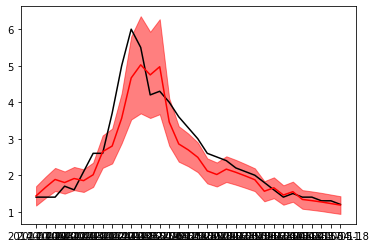

In [44]:
import matplotlib.pyplot as plt
plt.plot(curr_best['True'], color='black')
plt.plot(curr_best['Pred'], color='red')
plt.fill_between(curr_best.index, 
                 curr_best['Pred']-curr_best['Std'],
                 curr_best['Pred']+curr_best['Std'], color='red', alpha=0.5)

plt.show()

In [38]:
curr_best

,2014/2015
CRPS,0.261633
NLL,0.469633
MAE,0.375356
RMSE,0.515395
SMAPE,6.495350
Corr,0.930799
MB Log,-0.560022
SDP,-1.000000


In [13]:
pd.read_csv('results/hyper_parameter_optimisation/res_4/'+str(i)+'/test_metrics.csv', index_col=0).loc['MB Log']

2014/2015    --
Name: MB Log, dtype: object

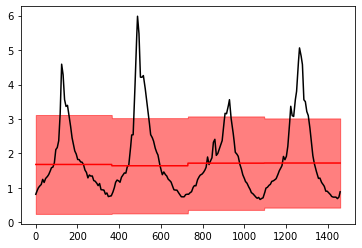

In [158]:
res = pd.read_csv('results/hyper_parameter_optimisation/'+str(best)+'/val_predictions.csv', index_col=0)
x = np.linspace(0,res['True'].shape[0]-1,res['True'].shape[0])

plt.plot(x, res['True'], color='black')
plt.plot(x, res['Pred'], color='red')
plt.fill_between(x, res['Pred']-res['Std'], res['Pred']+res['Std'],color='red', alpha=0.5)
plt.show()


In [159]:
results

array([0.11860864, 0.17763353])

In [160]:
i

12